# CSCI 3360 Homework 4 - Brandon Amirouche

## Instructions

consider the concrete compressive strength dataset (https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength). I have already separated the training and testing sets for you, so please directly work with \concretetraining.csv" and \concretetesting.csv" downloaded from eLC and answer the following questions.

Note:  you are strongly encouraged to use regression models from either scikit-learn or statsmodels.

1.	Using the training set, plot histograms of the eight input features/variables as well as the response variable, which represents concrete compressive strength.


2.	Using the training set, obtain the mean and standard deviation of each input feature as well as the response variable.


3.	Using the training set, report the correlation between each input feature and the response variable.


4.	Based  on  the correlation values from the previous question, which three input features exhibit the greatest correlation with the response variable?  Create scatter plots of the response variable vs. each of the three input features.


5.	Train the multiple linear regression  model using the training set, predict on  both the training and testing set, and report the R2 values on both the training and testing set.


6.	Train the ridge regression model using the training set. Train multiple times  by trying different values and observe how the coefficients and the R2 values change. Are there any coefficients that are rapidly moving towards (or becoming) 0 as you increase? Do not go beyond a value that causes significant reduction in R2.


7.	Train the lasso regression model using the training set. Train multiple times  by  trying  different values and observe how the coefficients and the R2 values change. Are there any coefficients that are rapidly moving towards (or becoming) 0 as you increase? Do not go beyond an value that causes significant reduction in R2.


8.	Train the quadratic regression model (including the interaction terms) using the training set. Report the R2 values on both the training and testing set.


9.	Train the cubic regression model (including the interaction terms) using the training set. Report the R2 values on both the training and testing set.


10.	Based on everything that you have observed so far, which is the best model?  Please justify your answer.


## Academic Honesty Statement

In [1]:
# first fill in your name
first_name = "Brandon"
last_name  = "Amirouche"

print("****************************************************************")
print("CSCI 3360 Homework 4")
print(f"completed by {first_name} {last_name}")
print(f"""
I, {first_name} {last_name}, certify that the following code
represents my own work. I have neither received nor given 
inappropriate assistance. I have not consulted with another
individual, other than a member of the teaching staff, regarding
the specific problems in this homework. I recognize that any 
unauthorized assistance or plagiarism will be handled in 
accordance with the University of Georgia's Academic Honesty
Policy and the policies of this course.
""")
print("****************************************************************")

****************************************************************
CSCI 3360 Homework 4
completed by Brandon Amirouche

I, Brandon Amirouche, certify that the following code
represents my own work. I have neither received nor given 
inappropriate assistance. I have not consulted with another
individual, other than a member of the teaching staff, regarding
the specific problems in this homework. I recognize that any 
unauthorized assistance or plagiarism will be handled in 
accordance with the University of Georgia's Academic Honesty
Policy and the policies of this course.

****************************************************************


## Problem 1

Using the training set, plot histograms of the eight input features/variables as well as the response variable, which represents concrete compressive strength.

     Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0     152.7               144.7      0.0  178.1               8.0   
1     500.0                 0.0      0.0  200.0               0.0   
2     166.0               259.7      0.0  183.2              12.7   
3     212.1                 0.0    121.6  180.3               5.7   
4     480.0                 0.0      0.0  192.0               0.0   
..      ...                 ...      ...    ...               ...   
819   236.9                91.7     71.5  246.9               6.0   
820   142.0               167.0    130.0  174.0              11.0   
821   251.4                 0.0    118.3  192.9               5.8   
822   427.5                47.5      0.0  228.0               0.0   
823   355.0                19.0     97.0  145.0              13.1   

     Coarse Aggregate  Fine Aggregate  Age  Concrete compressive strength  
0               999.7           822.2   28                          19.01  
1              1125

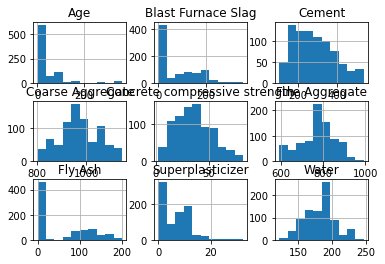

In [2]:
from typing import List
from collections import Counter
from typing import Dict
import csv
from collections import defaultdict
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from typing import NamedTuple
from scipy.spatial import distance
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

header_list = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 
               'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Concrete compressive strength']
data = pd.read_csv('concrete_training.csv', names=header_list)
df = pd.DataFrame(data)
print(df)
print(df.hist())

## Problem 2

Using the training set, obtain the mean and standard deviation of each input feature as well as the response variable.

In [3]:
print(f"(a)\n")
#Mean by Column
print(f"\tThe Mean value of each input feature in the Training Set:")
print(f"\t\tThe mean of the Cement input feature = {df.mean()[0]}")
print(f"\t\tThe mean of the Blast Furnace Slag input feature = {df.mean()[1]}")
print(f"\t\tThe mean of the Fly Ash input feature = {df.mean()[2]}")
print(f"\t\tThe mean of the Water input feature = {df.mean()[3]}")
print(f"\t\tThe mean of the Superplasticizer input feature = {df.mean()[4]}")
print(f"\t\tThe mean of the Coarse Aggregate input feature = {df.mean()[5]}")
print(f"\t\tThe mean of the Fine Aggregate input feature = {df.mean()[6]}")
print(f"\t\tThe mean of the Age input feature = {df.mean()[7]}")
print(f"\t\tThe mean of the Concrete compressive strength response variable = {df.mean()[8]}")


print(f"(b)\n")
#Standard Deviation by Column
print(f"\tThe Standard Deviation value of each input feature in the Training Set:")
print(f"\t\tThe standard deviation of the Cement input feature = {df.std(axis=0)[0]}")
print(f"\t\tThe standard deviation of the Blast Furnace Slag input feature = {df.std(axis=0)[1]}")
print(f"\t\tThe standard deviation of the Fly Ash input feature = {df.std(axis=0)[2]}")
print(f"\t\tThe standard deviation of the Water input feature = {df.std(axis=0)[3]}")
print(f"\t\tThe standard deviation of the Superplasticizer input feature = {df.std(axis=0)[4]}")
print(f"\t\tThe standard deviation of the Coarse Aggregate input feature = {df.std(axis=0)[5]}")
print(f"\t\tThe standard deviation of the Fine Aggregate input feature = {df.std(axis=0)[6]}")
print(f"\t\tThe standard deviation of the Age input feature = {df.std(axis=0)[7]}")
print(f"\t\tThe standard deviation of the Concrete compressive strength response variable = {df.std(axis=0)[8]}")
print(f"\n")

(a)

	The Mean value of each input feature in the Training Set:
		The mean of the Cement input feature = 281.2898058252426
		The mean of the Blast Furnace Slag input feature = 73.5757281553398
		The mean of the Fly Ash input feature = 54.12354368932043
		The mean of the Water input feature = 181.86638349514575
		The mean of the Superplasticizer input feature = 6.194660194174749
		The mean of the Coarse Aggregate input feature = 973.015169902912
		The mean of the Fine Aggregate input feature = 773.462742718447
		The mean of the Age input feature = 46.445388349514566
		The mean of the Concrete compressive strength response variable = 36.01469660194177
(b)

	The Standard Deviation value of each input feature in the Training Set:
		The standard deviation of the Cement input feature = 105.14357293129875
		The standard deviation of the Blast Furnace Slag input feature = 85.51223495104125
		The standard deviation of the Fly Ash input feature = 64.56738662714788
		The standard deviation of the

## Problem 3

Using the training set, report the correlation between each input feature and the response variable.

In [4]:
#Correlation between each input feature and the response variable
print(f"\tThe correlation between each input feature and the response variable in the Training Set:")
(df.corr().abs())

	The correlation between each input feature and the response variable in the Training Set:


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
Cement,1.000000,0.274385,0.408453,0.071663,0.089378,0.116268,0.236120,0.101991,0.494396
Blast Furnace Slag,0.274385,1.000000,0.329157,0.103441,0.054396,0.301407,0.247048,0.027303,0.141783
Fly Ash,0.408453,0.329157,1.000000,0.260429,0.369399,0.019326,0.080510,0.161881,0.109297
Water,0.071663,0.103441,0.260429,1.000000,0.670943,0.171579,0.488354,0.293440,0.280377
Superplasticizer,0.089378,0.054396,0.369399,0.670943,1.000000,0.276023,0.245619,0.196009,0.360785
Coarse Aggregate,0.116268,0.301407,0.019326,0.171579,0.276023,1.000000,0.169604,0.003390,0.182048
Fine Aggregate,0.236120,0.247048,0.080510,0.488354,0.245619,0.169604,1.000000,0.192997,0.161608
Age,0.101991,0.027303,0.161881,0.293440,0.196009,0.003390,0.192997,1.000000,0.346848
Concrete compressive strength,0.494396,0.141783,0.109297,0.280377,0.360785,0.182048,0.161608,0.346848,1.000000


## Problem 4

Based  on  the correlation values from the previous question, which three input features exhibit the greatest correlation with the response variable?  Create scatter plots of the response variable vs. each of the three input features.

	Scatter Plot for Concrete Compressive Strength(response variable) vs Cement(input variable):

AxesSubplot(0.125,0.125;0.775x0.755)


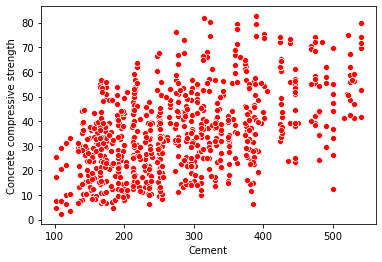

In [5]:
print(f"\tScatter Plot for Concrete Compressive Strength(response variable) vs Cement(input variable):\n")
print(sns.scatterplot(x = 'Cement', y = 'Concrete compressive strength', data = df, color = 'r'))

	Scatter Plot for Concrete Compressive Strength(response variable) vs Superplasticizer(input variable):

AxesSubplot(0.125,0.125;0.775x0.755)


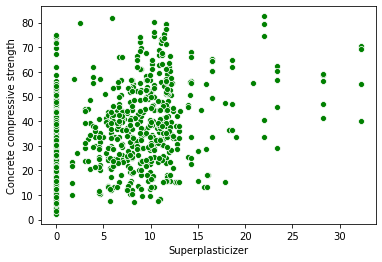

In [6]:
print(f"\tScatter Plot for Concrete Compressive Strength(response variable) vs Superplasticizer(input variable):\n")
print(sns.scatterplot(x = 'Superplasticizer', y = 'Concrete compressive strength', data = df, color = 'g'))

	Scatter Plot for Concrete Compressive Strength(response variable) vs Age(input variable):

AxesSubplot(0.125,0.125;0.775x0.755)


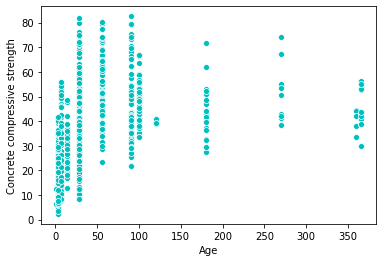

In [7]:
print(f"\tScatter Plot for Concrete Compressive Strength(response variable) vs Age(input variable):\n")
print(sns.scatterplot(x = 'Age', y = 'Concrete compressive strength', data = df, color = 'c'))

## Problem 5

Train the multiple linear regression  model using the training set, predict on  both the training and testing set, and report the R2 values on both the training and testing set.

In [8]:
from typing import Tuple
from statistics import mean, stdev
from scipy.stats import pearsonr
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

data1 = pd.read_csv('concrete_testing.csv', names=header_list)
df1 = pd.DataFrame(data1)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training se
regr.fit(df[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']], df['Concrete compressive strength'])

# Make predictions using the training set
concrete_prediction = regr.predict(df[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']])
#R2 Value of the training set
print(f"R2 Value of the training set:\n")
print('\tR-Squared: %.2f'
      % r2_score(df['Concrete compressive strength'], concrete_prediction))

print(f"\n")

# Make predictions using the testing set
concrete_prediction = regr.predict(df1[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']])
#R2 Value of the testing set
print(f"R2 Value of the testing set:\n")
print('\tR-Squared: %.2f'
      % r2_score(df1['Concrete compressive strength'], concrete_prediction))

R2 Value of the training set:

	R-Squared: 0.62


R2 Value of the testing set:

	R-Squared: 0.60


## Problem 6

Train the ridge regression model using the training set. Train multiple times  by trying different values and observe how the coefficients and the R2 values change. Are there any coefficients that are rapidly moving towards (or becoming) 0 as you increase? Do not go beyond a value that causes significant reduction in R2.

In [9]:
import statsmodels.api as sm
mod = sm.OLS(df['Concrete compressive strength'], df[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']])
res = mod.fit()

print(f"Ridge Regression when Alpha is .3:\n")
reg = linear_model.Ridge(alpha=.3)
reg.fit([[0, 0], [0.5, 3], [3, 2]], [0, .6, 7])
print(reg.intercept_)
print(reg.coef_)
print(f"\n")

print(f"Ridge Regression when Alpha is .5:\n")
reg = linear_model.Ridge(alpha=.5)
reg.fit([[0, 0], [0.5, 3], [3, 2]], [0, .6, 7])
print(reg.intercept_)
print(reg.coef_)
print(f"\n")

print(f"Ridge Regression when Alpha is .7:\n")
reg = linear_model.Ridge(alpha=.7)
reg.fit([[0, 0], [0.5, 3], [3, 2]], [0, .6, 7])
print(reg.intercept_)
print(reg.coef_)
print(f"\n")

print(f"Ridge Regression when Alpha is .9:\n")
reg = linear_model.Ridge(alpha=.9)
reg.fit([[0, 0], [0.5, 3], [3, 2]], [0, .6, 7])
print(reg.intercept_)
print(reg.coef_)
print(f"\n")

print(f"Ridge Regression when Alpha is .05:\n")
# alpha is .05
res_ridge = mod.fit_regularized(alpha = 0.05, L1_wt = 0)
print(res_ridge.params)
print(f"\n")

print(f"Ridge Regression when Alpha is .03:\n")
# alpha is .03
res_ridge = mod.fit_regularized(alpha = 0.03, L1_wt = 0)
print(res_ridge.params)
print(f"\n")

print(f"Ridge Regression when Alpha is .07:\n")
# alpha is .07
res_ridge = mod.fit_regularized(alpha = 0.07, L1_wt = 0)
print(res_ridge.params)
print(f"\n")
print(f"\n")

print(f"Both the first and second coefficient seems to be moving towards 0 as alpha increases.\n")

Ridge Regression when Alpha is .3:

0.07315371991247233
[ 2.31933807 -0.14742888]


Ridge Regression when Alpha is .5:

0.1216981132075472
[ 2.22704403 -0.11194969]


Ridge Regression when Alpha is .7:

0.16963539247561554
[ 2.14247562 -0.08151417]


Ridge Regression when Alpha is .9:

0.21672402667240265
[ 2.06463756 -0.05528071]


Ridge Regression when Alpha is .05:

[ 0.11632284  0.10111796  0.0871791  -0.18817924  0.17870211  0.00843508
  0.01382485  0.1152273 ]


Ridge Regression when Alpha is .03:

[ 0.11631696  0.10111142  0.08716704 -0.18816246  0.17892485  0.00843679
  0.01382054  0.11522801]


Ridge Regression when Alpha is .07:

[ 0.11632871  0.10112448  0.08719111 -0.18819595  0.17848005  0.00843338
  0.01382915  0.11522658]




Both the first and second coefficient seems to be moving towards 0 as alpha increases.



## Problem 7

Train the lasso regression model using the training set. Train multiple times  by  trying  different values and observe how the coefficients and the R2 values change. Are there any coefficients that are rapidly moving towards (or becoming) 0 as you increase? Do not go beyond an value that causes significant reduction in R2.

In [10]:
print(f"Lasso Regression when Alpha is .3:\n")
reg = linear_model.Lasso(alpha=0.3)
reg.fit([[0, 0], [0.5, 3], [3, 2]], [0, .6, 7])
print(reg.intercept_)
print(reg.coef_)
print(f"\n")

print(f"Lasso Regression when Alpha is .5:\n")
reg = linear_model.Lasso(alpha=0.5)
reg.fit([[0, 0], [0.5, 3], [3, 2]], [0, .6, 7])
print(reg.intercept_)
print(reg.coef_)
print(f"\n")

print(f"Lasso Regression when Alpha is .7:\n")
reg = linear_model.Lasso(alpha=0.7)
reg.fit([[0, 0], [0.5, 3], [3, 2]], [0, .6, 7])
print(reg.intercept_)
print(reg.coef_)
print(f"\n")

print(f"Lasso Regression when Alpha is .9:\n")
reg = linear_model.Lasso(alpha=0.9)
reg.fit([[0, 0], [0.5, 3], [3, 2]], [0, .6, 7])
print(reg.intercept_)
print(reg.coef_)
print(f"\n")

print(f"Lasso Regression when Alpha is .07:\n")
res_lasso = mod.fit_regularized(alpha = 0.05, L1_wt = 1) # Lasso
print(res_lasso.params)
print(f"\n")

print(f"Lasso Regression when Alpha is .03:\n")
# alpha is .03
res_lasso = mod.fit_regularized(alpha = 0.03, L1_wt = 1) # Lasso
print(res_lasso.params)
print(f"\n")

print(f"Lasso Regression when Alpha is .07:\n")
# alpha is .07
res_lasso = mod.fit_regularized(alpha = 0.07, L1_wt = 1) # Lasso
print(res_lasso.params)
print(f"\n")
print(f"\n")

print(f"The first coefficient is slowly approaching zero as alpha increases.\n") 
print(f"The second coefficient seems to be remaining at 0 regardless of alpha.\n")

Lasso Regression when Alpha is .3:

-0.07096774193548416
[ 2.23225806 -0.        ]


Lasso Regression when Alpha is .5:

0.06451612903225756
[ 2.11612903 -0.        ]


Lasso Regression when Alpha is .7:

0.1999999999999993
[ 2. -0.]


Lasso Regression when Alpha is .9:

0.33548387096774146
[ 1.88387097 -0.        ]


Lasso Regression when Alpha is .07:

Cement                0.099701
Blast Furnace Slag    0.080407
Fly Ash               0.059248
Water                -0.102124
Superplasticizer      0.586758
Coarse Aggregate      0.008167
Fine Aggregate        0.001148
Age                   0.107881
dtype: float64


Lasso Regression when Alpha is .03:

Cement                0.099686
Blast Furnace Slag    0.080390
Fly Ash               0.059214
Water                -0.102061
Superplasticizer      0.587663
Coarse Aggregate      0.008165
Fine Aggregate        0.001139
Age                   0.107890
dtype: float64


Lasso Regression when Alpha is .07:

Cement                0.099715
Blast Fu

## Problem 8

Train the quadratic regression model (including the interaction terms) using the training set. Report the R2 values on both the training and testing set.

In [11]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

X = np.arange(20).reshape(10, 2)
print(X)

y = [(x_i[0] + x_i[1] + np.random.randn()) ** 2  for x_i in X]

poly = PolynomialFeatures(2, include_bias = False)
X2 = poly.fit_transform(X)

print(X2)

reg = linear_model.LinearRegression()
reg.fit(X, y)
print(f"intercept = {reg.intercept_}")
print(f"coefficients = {reg.coef_}")
print(f"Linear Regression R-Squared = {r2_score(y, reg.predict(X))}")

reg.fit(X2, y)
print(f"intercept = {reg.intercept_}")
print(f"coefficients = {reg.coef_}")
print(f"Quadratic Regression R-Squared = {r2_score(y, reg.predict(X2))}")

print(f"\n")
print(f"\n")

# Summary of the training set
print(f"Summary of the training set including R2:\n")
mod = sm.OLS(df['Concrete compressive strength'], df[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']])
res = mod.fit()
print(res.summary())

print(f"\n")
print(f"\n")

# Summary of the testing set
print(f"Summary of the testing set including R2:\n")
mod1 = sm.OLS(df1['Concrete compressive strength'], df1[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']])
res1 = mod1.fit()
print(res1.summary())

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]]
[[  0.   1.   0.   0.   1.]
 [  2.   3.   4.   6.   9.]
 [  4.   5.  16.  20.  25.]
 [  6.   7.  36.  42.  49.]
 [  8.   9.  64.  72.  81.]
 [ 10.  11. 100. 110. 121.]
 [ 12.  13. 144. 156. 169.]
 [ 14.  15. 196. 210. 225.]
 [ 16.  17. 256. 272. 289.]
 [ 18.  19. 324. 342. 361.]]
intercept = -196.34290610886904
coefficients = [36.98986999 36.98986999]
Linear Regression R-Squared = 0.9604949242359153
intercept = -40.58071594721997
coefficients = [ 5.55259558  5.55259558 -4.64436124  0.90823434  6.46082993]
Quadratic Regression R-Squared = 0.9938489138529745




Summary of the training set including R2:

                                      OLS Regression Results                                      
Dep. Variable:     Concrete compressive strength   R-squared (uncentered):                   0.931
Model:                                       OLS   Adj. R-squared (uncentered):              0.930
Me

## Problem 9

Train the cubic regression model (including the interaction terms) using the training set. Report the R2 values on both the training and testing set.

In [12]:
X = np.arange(20).reshape(10, 2)
print(X)

y = [(x_i[0] + x_i[1] + np.random.randn()) ** 3  for x_i in X]

poly1 = PolynomialFeatures(3, include_bias = False)
X3 = poly1.fit_transform(X)

print(X3)

reg = linear_model.LinearRegression()
reg.fit(X, y)
print(f"intercept = {reg.intercept_}")
print(f"coefficients = {reg.coef_}")
print(f"Linear Regression R-Squared = {r2_score(y, reg.predict(X))}")

reg.fit(X3, y)
print(f"intercept = {reg.intercept_}")
print(f"coefficients = {reg.coef_}")
print(f"Quadratic Regression R-Squared = {r2_score(y, reg.predict(X3))}")

print(f"\n")
print(f"\n")

# Summary of the training set
print(f"Summary of the training set including R2:\n")
mod = sm.OLS(df['Concrete compressive strength'], df[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']])
res = mod.fit()
print(res.summary())

print(f"\n")
print(f"\n")

# Summary of the testing set
print(f"Summary of the testing set including R2:\n")
mod1 = sm.OLS(df1['Concrete compressive strength'], df1[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']])
res1 = mod1.fit()
print(res1.summary())

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]]
[[0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
  0.000e+00 1.000e+00]
 [2.000e+00 3.000e+00 4.000e+00 6.000e+00 9.000e+00 8.000e+00 1.200e+01
  1.800e+01 2.700e+01]
 [4.000e+00 5.000e+00 1.600e+01 2.000e+01 2.500e+01 6.400e+01 8.000e+01
  1.000e+02 1.250e+02]
 [6.000e+00 7.000e+00 3.600e+01 4.200e+01 4.900e+01 2.160e+02 2.520e+02
  2.940e+02 3.430e+02]
 [8.000e+00 9.000e+00 6.400e+01 7.200e+01 8.100e+01 5.120e+02 5.760e+02
  6.480e+02 7.290e+02]
 [1.000e+01 1.100e+01 1.000e+02 1.100e+02 1.210e+02 1.000e+03 1.100e+03
  1.210e+03 1.331e+03]
 [1.200e+01 1.300e+01 1.440e+02 1.560e+02 1.690e+02 1.728e+03 1.872e+03
  2.028e+03 2.197e+03]
 [1.400e+01 1.500e+01 1.960e+02 2.100e+02 2.250e+02 2.744e+03 2.940e+03
  3.150e+03 3.375e+03]
 [1.600e+01 1.700e+01 2.560e+02 2.720e+02 2.890e+02 4.096e+03 4.352e+03
  4.624e+03 4.913e+03]
 [1.800e+01 1.900e+01 3.240e+02 3.420e+02 3.610e+02 5.

## Problem 10

Based on everything that you have observed so far, which is the best model?  Please justify your answer.

Based on all of the information I have observed and tests ran, I believe the best model is the quadratic regression model. This is because it retains a high R2 number with a changing alpha, and doesn't seem to have the significant drop off. Also, the coefficients tend to approach zero at a more consistent rate.